1. PANDAS

**Pandas** es una de las librerías más usadas en Python cuando trabajamos con datos. Sirve para analizarlos y organizarlos de forma rápida y sencilla.

Quizás te preguntes: *¿qué es un DataFrame?* Pues bien, un DataFrame es como una tabla con filas y columnas, muy parecida a una hoja de Excel o a una tabla en una base de datos, pero con muchas funciones extra que hacen más fácil trabajar con la información.

En el mundo del análisis de datos y la ciencia de datos, necesitamos manejar mucha información de manera eficiente. Y justo ahí es donde **Pandas se convierte en una herramienta clave**.

En esta clase veremos ejemplos prácticos para entender:

1. Por qué Pandas es tan importante en el análisis de datos.
2. La diferencia entre usar solo Python o usar Pandas.
3. Cómo crear, modificar y analizar DataFrames.

📖 Documentación oficial de Pandas: [https://pandas.pydata.org/docs/user_guide/index.html#user-guide](https://pandas.pydata.org/docs/user_guide/index.html#user-guide)

---



2. OTRAS LIBRERÍAS RELACIONADAS

Antes de empezar con el análisis, es importante conocer las herramientas que vamos a utilizar. Además de **Pandas**, trabajaremos con estas librerías y aquí tienes una breve explicación de cada una:

* **Seaborn**: Esta librería hace que crear gráficos estadísticos bonitos y claros sea muy fácil. Funciona muy bien junto con los DataFrames de Pandas, lo que nos ayuda a visualizar patrones y tendencias en los datos de forma rápida.

* **Matplotlib**: Es la librería en la que está basada Seaborn. Con Matplotlib podemos generar todo tipo de gráficos y personalizarlos como queramos. Aunque Seaborn simplifica mucho el trabajo, en ocasiones necesitaremos usar Matplotlib directamente para hacer ajustes más específicos.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**3. Caso de uso: análisis del dataset *TIPS***

Google Colab ya trae instaladas varias librerías y también facilita la carga de conjuntos de datos. Una de esas librerías es **Seaborn**, que incluye algunos datasets de ejemplo. En este caso usaremos el dataset llamado **TIPS**.

Este dataset recoge información sobre las propinas que los clientes dejaron en un restaurante. Con ayuda de **Pandas** y los **DataFrames**, vamos a aprender a analizar estos datos y obtener conclusiones que nos permitan entender mejor el comportamiento de los clientes.

In [ ]:
# Cargar el dataset de propinas
df_tips = sns.load_dataset('tips')

**3.1. Exploración básica con DataFrames (TIPS)**

**Contexto:** El DataFrame *tips* contiene información sobre las propinas que distintos clientes dejaron en un restaurante. Su objetivo principal es analizar la relación entre el costo total de la comida y la propina, además de revisar otros factores como el día de la semana, si fue almuerzo o cena, y el tamaño del grupo de personas.

**Columnas principales:**

* **total_bill**: Monto total de la comida en dólares (USD).
* **tip**: Propina en dólares (USD).
* **sex**: Género del cliente (Hombre o Mujer).
* **smoker**: Indica si el cliente era fumador (Sí o No).
* **day**: Día de la semana en el que se registró la comida (Jueves, Viernes, Sábado o Domingo).
* **time**: Momento de la comida (Almuerzo o Cena).
* **size**: Número de personas en el grupo.

**Primer paso con un dataset:**
Antes de analizar en profundidad, es importante conocer qué datos contiene. Para esto, Pandas nos ofrece algunas funciones muy útiles:

* **head()**: Muestra las primeras filas del DataFrame.
* **info()**: Da un resumen general, indicando cuántos registros hay, tipos de datos y si hay valores vacíos.
* **describe()**: Calcula estadísticas básicas como promedio, mínimo, máximo, etc.

In [ ]:
# Muestra las primeras 5 lineas del dataset
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
# Información general
df_tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [ ]:
# Descripción estadística
df_tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


**Preguntas que vamos a responder:**

1. ¿Qué relación hay entre el total de la cuenta y la propina?
   → Veremos cómo correlacionar columnas.

2. ¿Cuál es el promedio de propina que dejan hombres y mujeres?
   → Usaremos **groupby** y aprenderemos sobre agregaciones.

3. ¿Cómo se reparten las propinas según el día de la semana?
   → Aplicaremos **groupby** de forma un poco más avanzada.

4. ¿Cuál es el total de facturas por día?
   → Usaremos funciones de ventana (*window functions*) para obtener valores acumulados.

5. ¿Existe alguna tendencia en las propinas según el tamaño del grupo?
   → Aquí entra en juego **pivot_table** para resumir y reorganizar datos.

---

**Antes de analizar, debemos manejar lo básico en Pandas:**

* **Copiar un DataFrame:** A veces queremos modificar datos sin afectar al original. Ojo: si solo lo asignamos a otra variable, no se crea una copia real, ambos apuntan al mismo objeto. Para hacer una copia independiente, usamos `.copy()`.


In [ ]:
# Hacer una copia del DataFrame original
df_tips_copy = df_tips.copy()


**Nota:** Si hacemos `df_tips_copy = df_tips`, no estamos creando una copia real. Ambas variables quedarían conectadas al mismo DataFrame en memoria, por lo que cualquier cambio en una afectará a la otra.

* **Renombrar columnas:** A veces los nombres de las columnas no son claros o pueden generar confusión. En esos casos, conviene renombrarlas para que sean más descriptivas y representativas.

In [ ]:
# Renombrar algunas columnas para hacerlas más descriptivas
df_tips_copy.rename(columns={'sex': 'gender', 'size': 'party_size'},
inplace=True)
df_tips_copy.head()

,total_bill,tip,gender,smoker,day,time,party_size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


**Tip:** Cuando usamos `inplace=True`, el DataFrame se cambia directamente y no se crea una copia.

* **Seleccionar datos con `.iloc[]` y `.loc[]`:** Son dos formas muy usadas para acceder a la información en un DataFrame.

  * **`.iloc[]`**: Sirve para elegir datos por su posición (números de fila o columna), como si fuera una tabla o matriz.
  * **`.loc[]`**: Sirve para elegir datos usando los nombres de las filas o columnas.

In [ ]:
# Uso de iloc
# Para seleccionar la primera fila del DataFrame.
first_row = df_tips.iloc[0]
print(first_row)

total_bill     16.99
tip             1.01
sex           Female
smoker            No
day              Sun
time          Dinner
size               2
Name: 0, dtype: object


In [ ]:
# Para seleccionar las primeras tres filas y las primeras dos columnas.
subset_data = df_tips.iloc[:3, :2]
print(subset_data)

   total_bill   tip
0       16.99  1.01
1       10.34  1.66
2       21.01  3.50


In [ ]:
# Uso de loc
# Para seleccionar datos de la columna 'gender' para las primeras cinco filas.
gender_data = df_tips.loc[:4, 'sex']
print(gender_data)

0    Female
1      Male
2      Male
3      Male
4    Female
Name: sex, dtype: category
Categories (2, object): ['Male', 'Female']


In [ ]:
# Para seleccionar datos de las columnas 'gender' y 'tip' para las primeras cinco filas.
subset_data = df_tips.loc[:4, ['sex', 'tip']]
print(subset_data)

      sex   tip
0  Female  1.01
1    Male  1.66
2    Male  3.50
3    Male  3.31
4  Female  3.61


* **Filtrar un DataFrame:** Muchas veces no necesitamos todos los datos, sino solo una parte. Por ejemplo, podríamos querer ver solo los registros en los que la propina es mayor a 5 dólares.

In [ ]:
# Filtrar el DataFrame para obtener registros donde la propina es mayor que $5
high_tips = df_tips[df_tips['tip'] > 5]
print(high_tips)

     total_bill    tip     sex smoker   day    time  size
23        39.42   7.58    Male     No   Sat  Dinner     4
44        30.40   5.60    Male     No   Sun  Dinner     4
47        32.40   6.00    Male     No   Sun  Dinner     4
52        34.81   5.20  Female     No   Sun  Dinner     4
59        48.27   6.73    Male     No   Sat  Dinner     4
85        34.83   5.17  Female     No  Thur   Lunch     4
88        24.71   5.85    Male     No  Thur   Lunch     2
116       29.93   5.07    Male     No   Sun  Dinner     4
141       34.30   6.70    Male     No  Thur   Lunch     6
155       29.85   5.14  Female     No   Sun  Dinner     5
170       50.81  10.00    Male    Yes   Sat  Dinner     3
172        7.25   5.15    Male    Yes   Sun  Dinner     2
181       23.33   5.65    Male    Yes   Sun  Dinner     2
183       23.17   6.50    Male    Yes   Sun  Dinner     4
211       25.89   5.16    Male    Yes   Sat  Dinner     4
212       48.33   9.00    Male     No   Sat  Dinner     4
214       28.1

In [ ]:
high_tips_female = df_tips[(df_tips['tip'] > 5) &
(df_tips['sex']=='Female')]
print(high_tips_female)

     total_bill   tip     sex smoker   day    time  size
52        34.81  5.20  Female     No   Sun  Dinner     4
85        34.83  5.17  Female     No  Thur   Lunch     4
155       29.85  5.14  Female     No   Sun  Dinner     5
214       28.17  6.50  Female    Yes   Sat  Dinner     3


**¿Cuál es la relación entre el total de la factura y la propina?**
Para saber cómo se relacionan dos variables, podemos usar la función `.corr()`, que nos da el coeficiente de correlación.
Si el valor está cerca de **1**, significa que hay una relación fuerte en la que ambas cosas aumentan juntas.
Si el valor está cerca de **-1**, significa que hay una relación fuerte en la que una sube mientras la otra baja.

In [ ]:
correlation = df_tips['total_bill'].corr(df_tips['tip'])
correlation

np.float64(0.6757341092113641)

También podemos visualizar esta relación con un gráfico de dispersión.

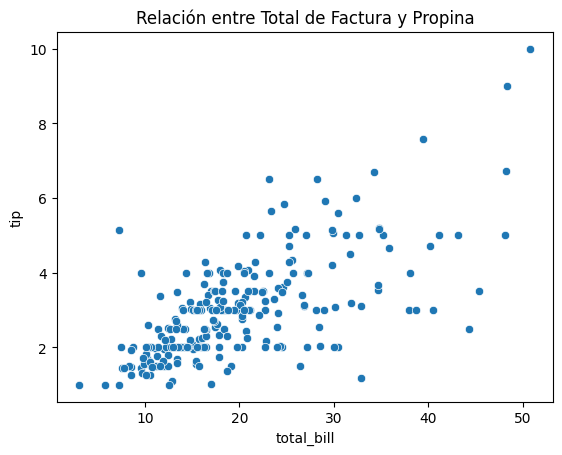

In [ ]:
sns.scatterplot(data=df_tips, x='total_bill', y='tip')
plt.title('Relación entre Total de Factura y Propina')
plt.show()

En el gráfico, cada punto representa una factura individual, con su total en el eje X y la propina
correspondiente en el eje Y. Parece que hay una tendencia: a medida que la factura aumenta,
también lo hace la propina.

**3.1.2 ¿Cuál es el promedio de propina que dejan hombres y mujeres?**
Para realizar esta tarea, utilizaremos la función .groupby()de Pandas. Esta función nos
permite agrupar un DataFrame en base a alguna columna (en este caso, el género) y aplicar
funciones de agregación (como calcular el promedio) a las columnas de interés.

In [ ]:
avg_tip_gender = df_tips.groupby('sex')['tip'].mean()
avg_tip_gender

/tmp/ipython-input-1361533091.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_tip_gender = df_tips.groupby('sex')['tip'].mean()


,tip
sex,
Male,3.089618
Female,2.833448


La salida muestra el promedio de propinas para hombres y mujeres. Esta es una de las ventajas
de Pandas: con una sola línea de código, podemos obtener resúmenes potentes de los datos.
Para visualizar de forma clara las diferencias en los promedios, usaremos un gráfico de barras:

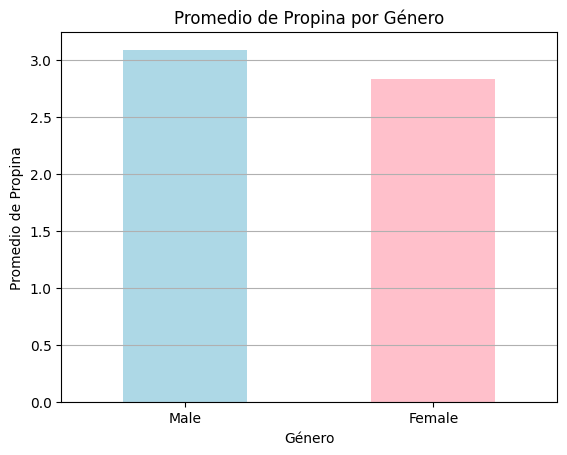

In [ ]:
avg_tip_gender.plot(kind='bar', color=['lightblue', 'pink'])
plt.title('Promedio de Propina por Género')
plt.xlabel('Género')
plt.ylabel('Promedio de Propina')
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.show()

A partir de los resultados obtenidos, podríamos observar [si hay / no hay] una diferencia
significativa entre el promedio de propinas dejadas por hombres y mujeres. Es importante
recordar que, aunque podemos identificar diferencias en el promedio, esto no necesariamente
implica causalidad. Siempre es bueno considerar otros factores o variables que podrían estar
influenciando estas observaciones.

*Potencial del groupby*

La función groupby es una herramienta poderosa y versátil en Pandas que te permite agrupar
tus datos de acuerdo a alguna categoría y luego aplicar una operación a esos grupos. A
continuación, presento algunas operaciones que puedes hacer con groupby:
•.mean(): Calcula el promedio de los grupos. Por ejemplo, tips.groupby('sex')
['total_bill'].mean() te daría el promedio de la factura por género.
•.sum(): Retorna la suma de los grupos. Así, tips.groupby('sex')
['total_bill'].sum() nos da la suma total de las facturas según el género.
•.max() y .min(): Obtiene el valor máximo o mínimo de cada grupo,
•.agg(): Esta es una función de agregación que te permite especificar múltiples
respectivamente.
estadísticas para cada grupo en una sola operación. Por ejemplo:

In [ ]:
df_tips.groupby('sex').agg({'total_bill': ['mean', 'sum'], 'tip':
['max', 'min']})

/tmp/ipython-input-451212833.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_tips.groupby('sex').agg({'total_bill': ['mean', 'sum'], 'tip':


total_bill            tip     
             mean      sum   max  min
sex                                  
Male    20.744076  3256.82  10.0  1.0
Female  18.056897  1570.95   6.5  1.0

•   .transform(): Te permite realizar una operación específica en cada grupo y devolver
un DataFrame con el índice original. Un ejemplo podría ser estandarizar datos dentro de
grupos:

In [ ]:
# Podriamos crear una columna extra, añadiencdo df_tips['zscore'] =df_tips.groupby('sex')['tip'].transform(zscore)
zscore = lambda x: (x - x.mean()) / x.std()
df_tips.groupby('sex')['tip'].transform(zscore)

/tmp/ipython-input-1936550373.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_tips.groupby('sex')['tip'].transform(zscore)


,tip
0,-1.572623
1,-0.960054
2,0.275590
3,0.147997
4,0.669733
...,...
239,1.900731
240,-0.718803
241,-0.731728
242,-0.899615


•  .filter(): Esta operación permite filtrar datos basados en propiedades del grupo. Por
ejemplo, si quisieras mantener solo los días donde la factura promedio supera un cierto
valor:

In [ ]:
df_tips.groupby('day').filter(lambda x: x['total_bill'].mean() > 20)

/tmp/ipython-input-2832618003.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_tips.groupby('day').filter(lambda x: x['total_bill'].mean() > 20)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
238,35.83,4.67,Female,No,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2


3.1.3 ¿Cómo se distribuyen las propinas entre los días de la semana?
En muchos restaurantes, los días de la semana pueden influir en la cantidad y el total de las
propinas que los camareros reciben. Esto puede estar relacionado con el tráfico de clientes, la
naturaleza de las reservas (por ejemplo, eventos especiales o cenas de fin de semana) u otros
factores. Aquí, vamos a crear una nueva columna que represente el porcentaje de propina con
respecto a la factura total. Luego, utilizaremos esta nueva columna para analizar cómo se
distribuyen las propinas en relación con el total de la factura a lo largo de la semana.

In [ ]:
df_tips['tip_percentage'] = (df_tips['tip'] / df_tips['total_bill']) * 100
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


No obstante, las columnas se están generando como un MultiIndex debido a la función .agg.
Podemos aplanar este MultiIndex y nombrar las columnas de manera más accesible. Para evitar
esto, podemos realizar la agrupación de la siguiente forma:

In [ ]:
# Definimos las funciones de agregación
agg_funcs = {
'tip_percentage': ['mean', 'std', 'min', 'max']
}

grouped_data = df_tips.groupby(['day', 'sex']).agg(agg_funcs).reset_index()

# Renombramos las columnas después de la agregación para evitar MultiIndex
grouped_data.columns = ['_'.join(col).strip() if col[1] else col[0]
for col in grouped_data.columns.values]

grouped_data.head()

/tmp/ipython-input-2210081640.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df_tips.groupby(['day', 'sex']).agg(agg_funcs).reset_index()


,day,sex,tip_percentage_mean,tip_percentage_std,tip_percentage_min,tip_percentage_max
0,Thur,Male,16.527649,4.586551,7.861635,26.631158
1,Thur,Female,15.752483,3.068869,7.296137,21.150934
2,Fri,Male,14.338519,3.622837,10.355540,22.377622
3,Fri,Female,19.938840,4.217047,14.285714,26.348039
4,Sat,Male,15.157684,4.694377,3.563814,29.198966


Este código primero realiza las operaciones de agregación. Luego, renombra las columnas
después de la agregación utilizando una list comprehension para formatear los nombres de las
columnas. Hay otras formas de hacerlo, pero por ahora esta te va a servir.

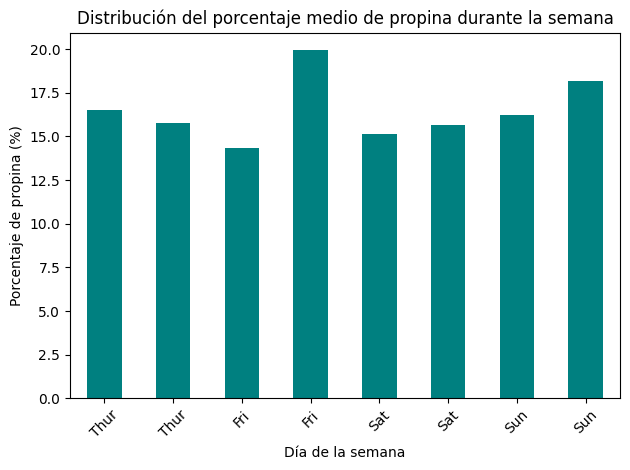

In [ ]:
grouped_data.reset_index(inplace=True) # Reseteamos el índice para facilitar el gráfico
grouped_data.plot(x='day', y='tip_percentage_mean', kind='bar',
legend=False, color='teal')
plt.title('Distribución del porcentaje medio de propina durante la semana')
plt.ylabel('Porcentaje de propina (%)')
plt.xlabel('Día de la semana')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Después de haber agrupado nuestros datos por día y sexo, y haber calculado el porcentaje medio
de propina, ahora vamos a visualizar estos resultados. Para ello, vamos a utilizar un gráfico de
barras, que es una herramienta eficaz para comparar cantidades de diferentes categorías.
El eje X de nuestro gráfico representa los días de la semana, mientras que el eje Y muestra el
porcentaje medio de propina dado en ese día. Así, podemos tener una vista rápida y clara de
cómo se distribuye el comportamiento de propinas a lo largo de la semana.
En el gráfico, podemos observar:

•  La altura de cada barra muestra el porcentaje medio de propina para ese día específico.

•  La elección del color "teal" (verde azulado) es meramente estética y para proporcionar
una visualización clara.

Estudiar este tipo de gráficos nos ayuda a identificar tendencias, patrones o cualquier anomalía
en los datos. Por ejemplo, podríamos descubrir si hay un día específico en el que los clientes
tienden a ser más generosos con las propinas, lo que podría indicar una mayor afluencia de
clientes o tal vez alguna promoción especial que incite a los clientes a dar mayores propinas.

3.1.4 ¿Cuál es la factura total por día de la semana?
En muchas situaciones, nos interesa no solo agrupar y sumar datos, sino también entender
cómo se acumulan o se distribuyen a lo largo de una variable específica. Las funciones de
ventana en Pandas nos permiten hacer precisamente eso. Por ejemplo, podemos querer sabercómo se acumulan las ventas a lo largo de la semana o cómo se distribuyen las propinas durante
los días. En este ejercicio, vamos a investigar cómo se acumula la factura total por día de la
semana.
Comenzaremos agrupando nuestros datos por día de la semana y sumando las facturas para
cada día. Después, utilizaremos la función .cumsum() para obtener un acumulado.

In [ ]:
# Load the tips dataset
import seaborn as sns
df_tips = sns.load_dataset('tips')

# Agrupamos por día y sumamos las facturas
total_bill_per_day = df_tips.groupby('day')['total_bill'].sum().sort_values()

# Usamos cumsum() para obtener el acumulado
total_bill_cumsum = total_bill_per_day.cumsum()
total_bill_cumsum

/tmp/ipython-input-58391186.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_bill_per_day = df_tips.groupby('day')['total_bill'].sum().sort_values()


,total_bill
day,
Fri,325.88
Thur,1422.21
Sun,3049.37
Sat,4827.77


La función .cumsum() es una función de ventana que proporciona la suma acumulada de una
serie o DataFrame. Así, después de agrupar y sumar nuestras facturas por día, utilizamos
.cumsum() para obtener un valor acumulativo a lo largo de los días de la semana. Para
visualizar estos datos, un gráfico de barras es apropiado, ya que queremos ver tanto la factura
total por día como el acumulado.

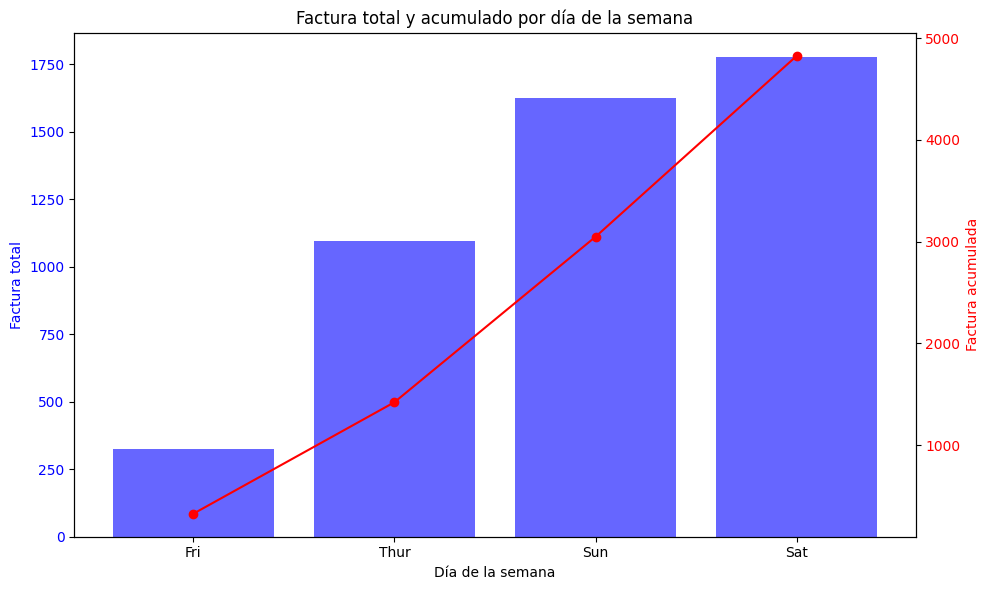

In [ ]:
# Plot de los datos
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10,6))
# Eje principal con las facturas por día
ax1.bar(total_bill_per_day.index, total_bill_per_day.values,
color='blue', alpha=0.6, label='Factura por día')
ax1.set_title('Factura total y acumulado por día de la semana')
ax1.set_xlabel('Día de la semana')
ax1.set_ylabel('Factura total', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
# Eje secundario con el acumulado
ax2 = ax1.twinx()
ax2.plot(total_bill_cumsum.index, total_bill_cumsum.values,
color='red', marker='o', label='Factura acumulada')
ax2.set_ylabel('Factura acumulada', color='red')
ax2.tick_params(axis='y', labelcolor='red')
fig.tight_layout()
plt.show()

En este gráfico, las barras azules representan la factura total por día, mientras que la línea roja
muestra cómo se acumula esta factura a lo largo de la semana.
Las funciones de ventana, como .cumsum(), son herramientas poderosas cuando se desea
comprender la distribución o acumulación de datos a lo largo de una variable. En nuestro caso,
observamos cómo se acumulan las facturas a lo largo de los días de la semana. Estas técnicas
son esenciales, especialmente en análisis financieros o de ventas, donde los acumulados son
cruciales para la toma de decisiones.

3.1.5 ¿Hay alguna tendencia observable en la propina basada en el tamaño del grupo
que cena?
Cuando comemos en grupo, la dinámica de dar propina puede cambiar. Ya sea por la naturaleza
social de comer en grupo o por la percepción de un servicio más intensivo para grupos más
grandes, podríamos esperar que el tamaño del grupo influya en la propina. Para entender esto,
usaremos la función pivot_table que nos ayuda a resumir y reestructurar nuestros datos de
una manera que podamos visualizar y analizar de forma más clara.
Una pivot_table es esencialmente una tabla de resumen, que toma datos simples en
columnas y los convierte en una tabla de dos dimensiones. Esto nos permite observar la relación
entre dos columnas y cómo una tercera columna podría variar con respecto a esas dos.

In [ ]:
import seaborn as sns
df_tips = sns.load_dataset('tips')
pivot_data = df_tips.pivot_table(values='tip', index='size',
aggfunc='mean')
pivot_data

,tip
size,
1,1.437500
2,2.582308
3,3.393158
4,4.135405
5,4.028000
6,5.225000


Para visualizar la relación, podemos usar un gráfico de barras:

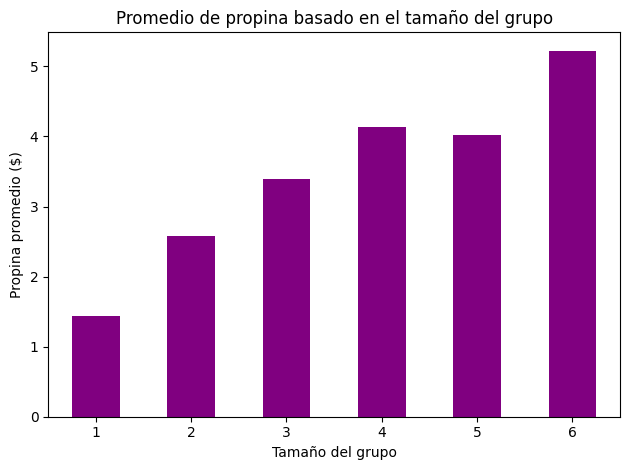

In [ ]:
import matplotlib.pyplot as plt

pivot_data.plot(kind='bar', color='purple', legend=False)
plt.title('Promedio de propina basado en el tamaño del grupo')
plt.ylabel('Propina promedio ($)')
plt.xlabel('Tamaño del grupo')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Después de observar el gráfico, es posible que veamos una tendencia creciente en la propina a
medida que aumenta el tamaño del grupo, lo que podría indicar que los grupos más grandes
tienden a dejar propinas más generosas. Sin embargo, es esencial considerar que la propina
también puede estar influenciada por factores como el total de la factura, el servicio recibido y
otras variables que no estamos considerando directamente en este análisis.

Extra tips pivot_table en detalle:

• values: Es la columna que queremos resumir o analizar. En nuestro caso, nos interesa el valor de la "propina".

• index: Es la columna contra la que queremos analizar nuestros valores. Estamos interesados en el "tamaño" del grupo.

• aggfunc: Es la función de agregación que aplicamos a nuestros valores. En este caso, estamos interesados en la "media", pero podríamos haber usado .sum, .min,
.max, entre otros.


Extra tips pivot_table en detalle:

La función pivot_table es potentemente flexible y se puede utilizar para analizar datos de
muchas formas diferentes. Es una herramienta fundamental para el análisis de datos en Pandas.